# Анализ топ 500 мировых компаний


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
import cufflinks
cufflinks.go_offline()
f500 = pd.read_csv('f500.csv')
f500.dropna(axis=0, inplace=True)
f500

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
496,New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
497,Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
498,TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006


In [2]:
f500.describe()

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,436.000000,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000,4.360000e+02,436.000000
mean,250.385321,55452.096330,4.943119,3461.046789,2.571798e+05,24.152752,224.516055,15.155963,1.355923e+05,31568.589450
std,145.363905,45782.479632,27.664484,5152.937682,5.060953e+05,437.509566,147.192539,7.903934,1.765144e+05,43559.520854
min,1.000000,21609.000000,-53.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-12688.000000
25%,120.500000,28742.250000,-5.050000,807.125000,3.658850e+04,-22.775000,93.750000,8.000000,4.219875e+04,8312.250000
50%,253.500000,40127.000000,0.850000,1926.050000,7.354650e+04,-0.350000,221.500000,17.000000,9.079200e+04,17107.500000
75%,378.250000,65307.250000,7.200000,4330.500000,1.980488e+05,17.700000,351.250000,23.000000,1.707678e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


In [3]:
f500_gc = f500.groupby("country").mean()
f500_gc

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
country,,,,,,,,,,
Australia,330.428571,33688.714286,-16.857143,1380.228571,399771.000000,-116.685714,255.142857,16.428571,87579.000000,35777.571429
Belgium,206.000000,45905.000000,5.300000,1241.000000,258381.000000,-85.000000,211.000000,12.000000,206633.000000,71339.000000
Brazil,219.200000,50680.800000,7.380000,2872.660000,249567.400000,-32.960000,228.400000,12.800000,108435.200000,21305.600000
Britain,285.842105,46619.052632,34.110526,2240.547368,318960.000000,1.105263,268.526316,19.631579,112166.947368,21536.315789
Canada,334.600000,32738.500000,10.910000,2976.440000,356765.100000,68.110000,310.800000,14.400000,82928.600000,25365.700000
China,243.711111,59040.211111,6.164444,3518.804444,313088.066667,-4.822222,199.766667,7.088889,193949.511111,35675.011111
Denmark,298.000000,35464.000000,-12.000000,-1939.000000,61118.000000,-345.100000,240.000000,14.000000,87736.000000,31258.000000
Finland,415.000000,26113.000000,73.400000,-847.100000,47354.000000,-131.000000,0.000000,19.000000,102687.000000,21192.000000
France,231.115385,55620.346154,-0.292308,2796.653846,370856.230769,40.807692,221.692308,20.538462,157798.307692,32375.538462


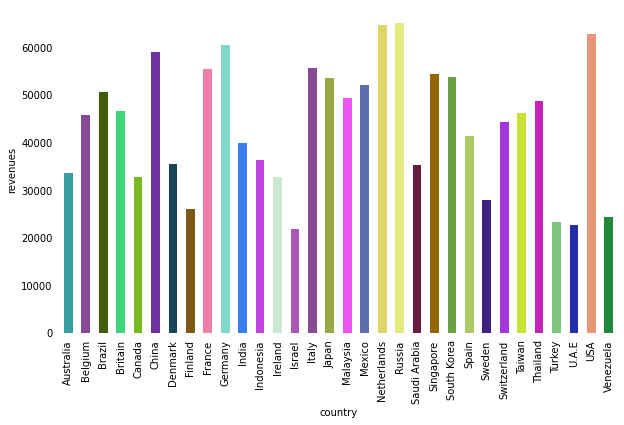

In [4]:
co = np.random.rand(34, 3)
ax = f500_gc.plot(y="revenues", kind="bar", figsize=(10,6), color = co)
plt.legend().remove()
plt.ylabel("revenues")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Россия на первом месте по сумме оборотов компани. Далее с небольшим отрывом Нидерланды, США.

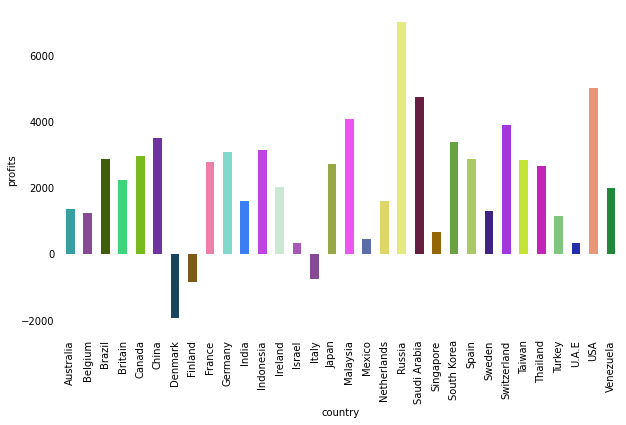

In [5]:
ax = f500_gc.plot(y="profits", kind="bar", figsize=(10,6), color=co)
plt.legend().remove()
plt.ylabel('profits')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Россия также находится на первом месте по количеству прибыли. Рассмотрим эти компании:

In [6]:
f500[f500["country"]=="Russia"]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
62,Gazprom,63,91382,-8.1,14222.6,277262,10.4,Alexey B. Miller,Energy,Energy,56,Russia,"Moscow, Russia",http://www.gazprom.com,21,467400,181813
101,Lukoil,102,70897,-16.3,3090.6,82179,-35.1,Vagit Y. Alekperov,Petroleum Refining,Energy,76,Russia,"Moscow, Russia",http://www.lukoil.com,18,105500,52783
157,Rosneft Oil,158,56553,-12.7,2705.1,180756,-53.4,Igor I. Sechin,Petroleum Refining,Energy,118,Russia,"Moscow, Russia",http://www.rosneft.com,12,295800,54227
231,Sberbank,232,42159,-7.6,8078.0,415730,121.0,Herman O. Gref,Banks: Commercial and Savings,Financials,199,Russia,"Moscow, Russia",http://www.sberbank.ru,10,325075,46182


Sberbank, Gazprom на 50% принадлежат государству, Rosneft на 100%.

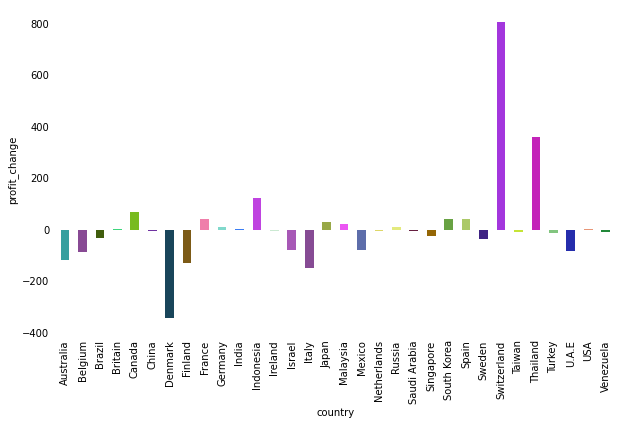

In [7]:
ax = f500_gc.plot(y="profit_change", kind="bar", figsize=(10,6), color=co) 
plt.legend().remove()
plt.ylabel('profit_change')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Видно, что Швейцария и Таиланд в 2017 имеют наибольшую положительную разницу в прибыли с предыдущем годом. А вот отрицательную разницу имеют Дания, Италия, Финляндия.

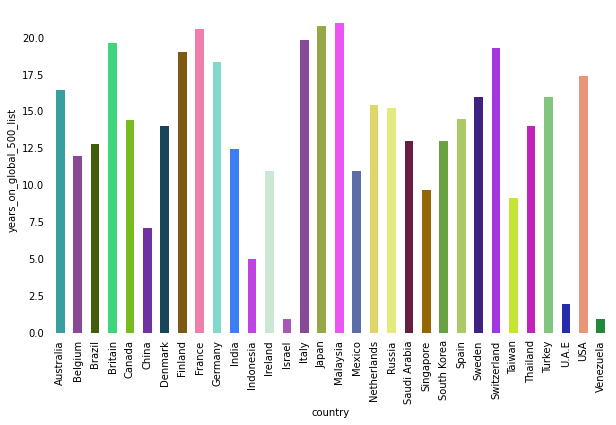

In [8]:
ax = f500_gc.plot(y="years_on_global_500_list", kind="bar", figsize=(10,6),color=co)
ax.tick_params(bottom=False, left=False)
ax.legend().remove()
ax.set_ylabel("years_on_global_500_list")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

Малайзия, Япония, Франция, Британия топовые компании этих стран в среднем дольше находились на в топе. Венесуэла, Израиль, Объединенные Арабские Эмираты, Индонезия компании этих стран меньше времени провели в топе.

In [9]:
f500_gc2 = f500.groupby("sector").mean()

In [10]:
f500_gc2.describe()

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,274.056622,49342.803469,2.490221,3023.801956,100603.875473,153.662659,252.076270,15.940663,150579.183385,21284.110725
std,72.754086,14936.314899,5.166990,1835.029828,156343.051025,661.934465,75.985456,3.287353,94975.707219,13953.175540
min,132.428571,23213.333333,-7.916667,812.221739,12174.000000,-28.161111,136.428571,8.461538,44019.666667,1711.666667
25%,234.185185,38692.500000,-0.866667,1499.430769,45045.466667,-10.578571,210.629630,13.897436,91443.761062,11468.214286
50%,274.800000,48284.478261,1.566667,2711.181250,65213.750000,5.284615,231.750000,15.666667,133527.759259,15152.375000
75%,289.000000,56543.148148,6.154545,4553.966667,80000.222222,18.339394,275.625000,18.642857,176679.538462,27577.242424
max,470.000000,77139.142857,12.159292,6558.400000,762766.168142,3039.333333,467.666667,23.000000,442591.333333,50326.619469


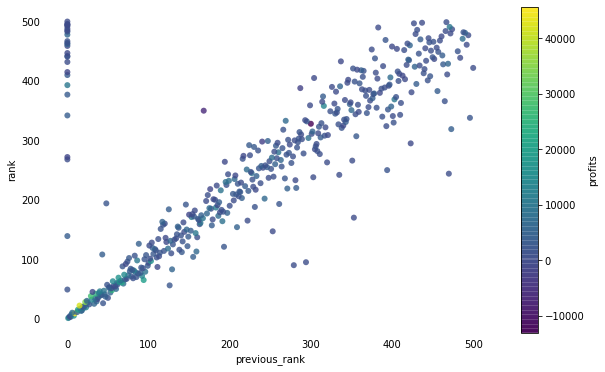

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
sc = ax.scatter(f500["previous_rank"], f500["rank"],c=f500["profits"],cmap='viridis', linewidth=0, alpha=0.8)
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("profits")
ax.set_xlabel("previous_rank")
ax.set_ylabel("rank")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Заметно, что чем ближе компания к первому месту, тем она стабильнее в рейтинге, поскольку разброс сужается к единице, но также есть компании, которые резко упали вниз рейтинга.

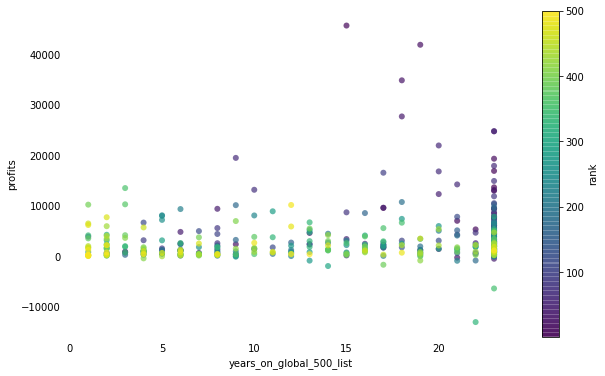

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
sc = ax.scatter(f500["years_on_global_500_list"], f500["profits"],cmap='viridis', c=f500["rank"], linewidth=0, alpha=0.7)
ax.set_xlabel("years_on_global_500_list")
ax.set_ylabel("profits")
cbar = fig.colorbar(sc)
cbar.set_label("rank")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Существует корреляция, что большинство компаний, находящихся на верхушке рейтинга, дольше провели времени в этом топе и имеют больши́е заработки. И чем больше компания в рейтинге, тем больше она зарабатывает. 

array([[<AxesSubplot:xlabel='years_on_global_500_list', ylabel='years_on_global_500_list'>,
        <AxesSubplot:xlabel='profits', ylabel='years_on_global_500_list'>,
        <AxesSubplot:xlabel='rank', ylabel='years_on_global_500_list'>],
       [<AxesSubplot:xlabel='years_on_global_500_list', ylabel='profits'>,
        <AxesSubplot:xlabel='profits', ylabel='profits'>,
        <AxesSubplot:xlabel='rank', ylabel='profits'>],
       [<AxesSubplot:xlabel='years_on_global_500_list', ylabel='rank'>,
        <AxesSubplot:xlabel='profits', ylabel='rank'>,
        <AxesSubplot:xlabel='rank', ylabel='rank'>]], dtype=object)

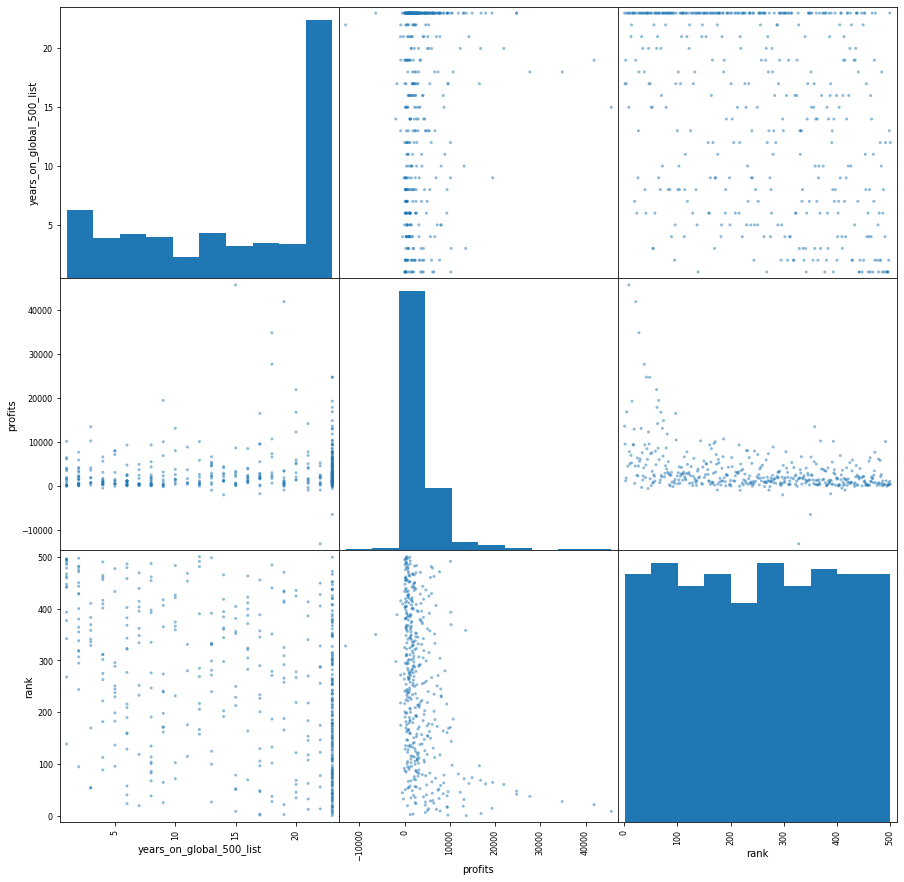

In [13]:
scatter_matrix(f500[["years_on_global_500_list", "profits", "rank"]], figsize=(15,15))

Наши предыдущие выводы подтвердились.

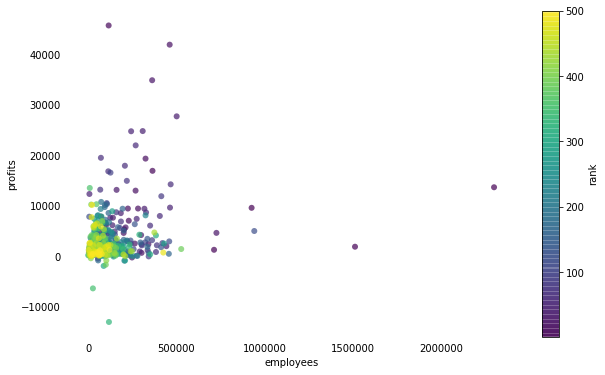

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
sc = ax.scatter(f500['employees'], f500['profits'], c=f500['rank'], linewidth=0, alpha=0.7)
ax.set_xlabel('employees')
ax.ticklabel_format(axis='x', style="plain")
ax.set_ylabel('profits')
cbar = fig.colorbar(sc)
cbar.set_label('rank')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)

Опять же видно, чем больше рейтинг, тем больше заработки. Также топовые компании имеют больше работников. Проверим выводы ниже:

array([[<AxesSubplot:xlabel='profits', ylabel='profits'>,
        <AxesSubplot:xlabel='employees', ylabel='profits'>,
        <AxesSubplot:xlabel='rank', ylabel='profits'>],
       [<AxesSubplot:xlabel='profits', ylabel='employees'>,
        <AxesSubplot:xlabel='employees', ylabel='employees'>,
        <AxesSubplot:xlabel='rank', ylabel='employees'>],
       [<AxesSubplot:xlabel='profits', ylabel='rank'>,
        <AxesSubplot:xlabel='employees', ylabel='rank'>,
        <AxesSubplot:xlabel='rank', ylabel='rank'>]], dtype=object)

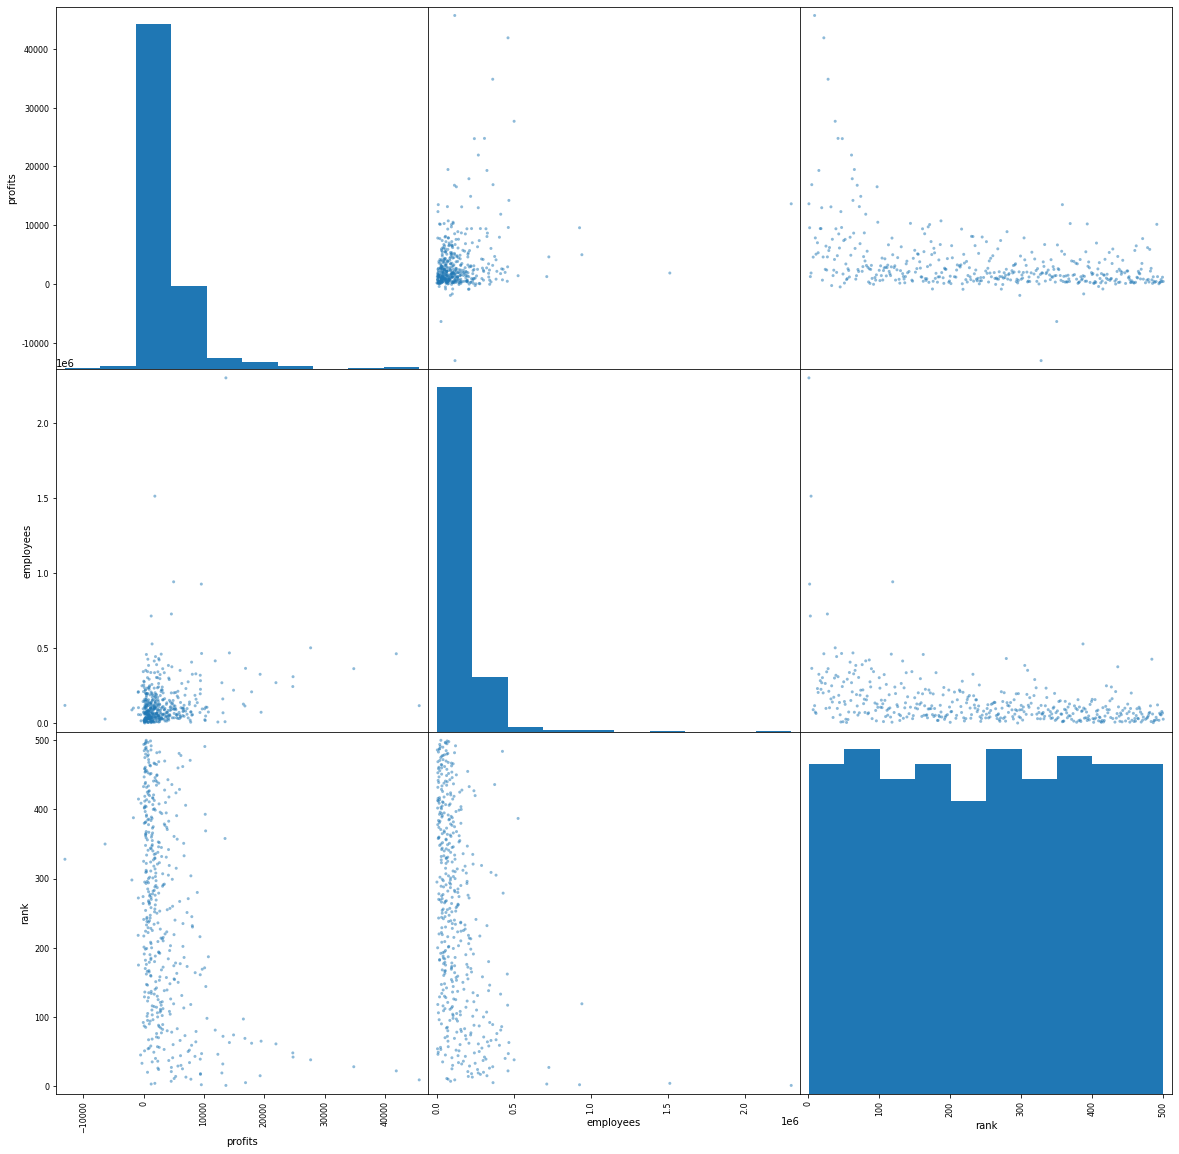

In [15]:
scatter_matrix(f500[["profits", "employees", "rank"]], figsize=(20,20))